In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
Test=pd.read_csv("Dataset/Titanic/test.csv")
Train=pd.read_csv("Dataset/Titanic/train.csv")
print(Test.shape)
print(Train.shape)

(418, 11)
(891, 12)


In [322]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [323]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [324]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [325]:
Train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [326]:
Test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [327]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [328]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [329]:
cat_col_train=['Embarked']
num_col_train=['Age']

Train['Age']=Train['Age'].fillna(value=Train['Age'].mean())
Train['Embarked']=Train['Embarked'].fillna(value=Train['Embarked'].mode()[0])


In [330]:
num_col_test=['Age','Fare']

Test['Age']=Test['Age'].fillna(value=Train['Age'].mean())
Test['Fare']=Test['Fare'].fillna(value=Train['Fare'].mean())


In [331]:
col_drop=['PassengerId','Name','Cabin']

for k in col_drop:
    Train.drop(columns=k,axis=1,inplace=True)
    Test.drop(columns=k,axis=1,inplace=True)



In [332]:
Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [333]:
Train.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

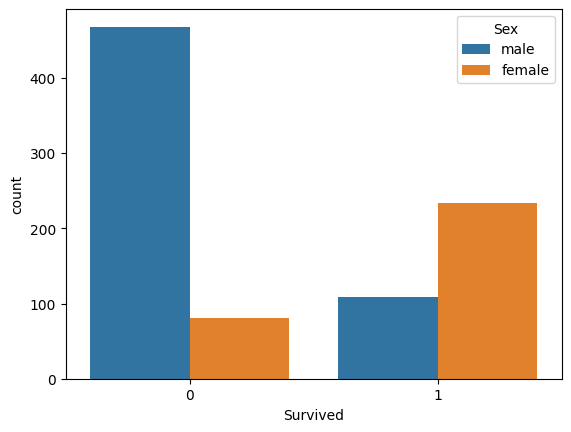

In [334]:
cols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked']
sns.countplot(x='Survived',hue='Sex',data=Train)


<Axes: xlabel='Pclass', ylabel='count'>

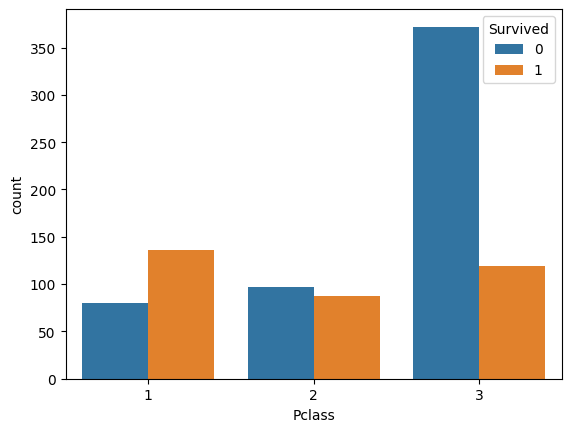

In [335]:
sns.countplot(x='Pclass',hue='Survived',data=Train)

<Axes: xlabel='SibSp', ylabel='count'>

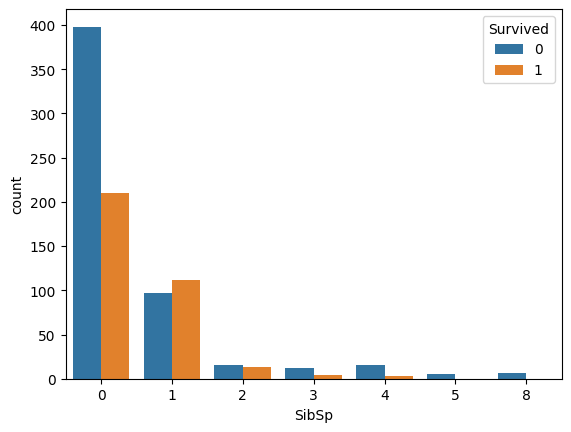

In [336]:
sns.countplot(x='SibSp', hue='Survived', data=Train)

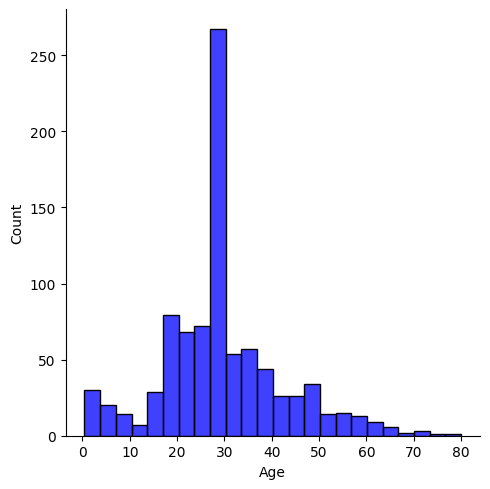

In [337]:
sns.displot(Train['Age'], bins=24, color='b')

In [338]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

cat_cols=Train.dtypes[Train.dtypes=='object'].index
num_cols=Train.dtypes[Train.dtypes!='object'].index
#cat_cols=Train.select_dtypes('object').columns



In [339]:
le = LabelEncoder()

Train[cat_cols] = Train[cat_cols].apply(le.fit_transform)
Test[cat_cols] = Test[cat_cols].apply(le.fit_transform)


In [340]:
scaler=StandardScaler()
X=Train.drop(columns='Survived',axis=1).values
y=Train["Survived"].values
X=scaler.fit_transform(X)


Test=scaler.fit_transform(Test)


In [341]:
from sklearn.model_selection import train_test_split, cross_val_score

# normaliztion
from sklearn.preprocessing import StandardScaler

# tree based models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# metrics
from sklearn.metrics import accuracy_score

In [359]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape

(712, 8)

Neural Network 

In [343]:
import tensorflow as tf

In [360]:
def train_model(X_train, y_train, num_nodes, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
     tf.keras.layers.Dense(num_nodes, activation='relu',input_shape=(8,)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model

In [361]:
model=train_model(X_train,y_train,32,0.01,32,100)




c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [363]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [347]:
class Model:
    def __init__(self, model):
        self.model = model
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train,X_test,y_train,y_test
        self.train()
    
    def model_name(self):
        model_name = type(self.model).__name__
        return model_name
        
    def cross_validation(self, cv=5):
        print(f"Evaluate {self.model_name()} score by cross-validation...")
        CVS = cross_val_score(self.model, self.X, self.y, scoring='accuracy', cv=cv)
        print(CVS)
        print("="*60, "\nMean accuracy of cross-validation: ", CVS.mean())
    
    def train(self):
        print(f"Training {self.model_name()} Model...")
        self.model.fit(X_train, y_train)
        print("Model Trained.")
        
    def prediction(self, test_x=None, test=False):
        if test == False:
            y_pred = self.model.predict(self.X_test)
        else:
            y_pred = self.model.predict(test_x)
            
        return y_pred
    
    def accuracy(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = accuracy_score(y_pred, y_test)
        print(f"{self.model_name()} Model Accuracy: ", acc)

In [348]:
xgb = XGBClassifier(random_state=42, n_estimators=222)
xgb = Model(xgb)

xgb.cross_validation()

Training XGBClassifier Model...
Model Trained.
Evaluate XGBClassifier score by cross-validation...
[0.78212291 0.75842697 0.82022472 0.79775281 0.85955056]
Mean accuracy of cross-validation:  0.8036155922415416


In [349]:
xgb.accuracy()

XGBClassifier Model Accuracy:  0.8100558659217877


In [350]:
rfc = RandomForestClassifier(random_state=42)
rfc = Model(rfc)

rfc.cross_validation()

Training RandomForestClassifier Model...
Model Trained.
Evaluate RandomForestClassifier score by cross-validation...
[0.81005587 0.80337079 0.83146067 0.83146067 0.87078652]
Mean accuracy of cross-validation:  0.8294269035214363


In [351]:
rfc.accuracy()

RandomForestClassifier Model Accuracy:  0.8156424581005587


In [352]:
xgb_pred = xgb.prediction(test_x=Test, test=True)
rfc_pred = rfc.prediction(test_x=Test, test=True)


In [353]:
sub=pd.read_csv('Dataset/Titanic/gender_submission.csv')
sub['Survived'] = xgb_pred # Best solo Submission (Top 5% LB)
sub.to_csv('xgb_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [354]:
sub['Survived'] = rfc_pred
sub.to_csv('rfc_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
